<a href="https://colab.research.google.com/github/MohammadMahdi1375/ClassificationProblem_S3.2/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

60000
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:154: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


19100 [Discriminator Loss : 0.6537907421588898]  [Generator Loss : 0.8648000955581665]
19200 [Discriminator Loss : 0.6646135449409485]  [Generator Loss : 0.8563633561134338]
19300 [Discriminator Loss : 0.6520642638206482]  [Generator Loss : 0.8612085580825806]
19400 [Discriminator Loss : 0.6628826856613159]  [Generator Loss : 0.8666934967041016]
19500 [Discriminator Loss : 0.6635235548019409]  [Generator Loss : 0.8744361996650696]
19600 [Discriminator Loss : 0.6420756876468658]  [Generator Loss : 0.856407880783081]
19700 [Discriminator Loss : 0.6867027878761292]  [Generator Loss : 0.8414061069488525]
19800 [Discriminator Loss : 0.6383300423622131]  [Generator Loss : 0.8217225074768066]
19900 [Discriminator Loss : 0.6847518980503082]  [Generator Loss : 0.8367487788200378]
20000 [Discriminator Loss : 0.6764746904373169]  [Generator Loss : 0.8755736351013184]
preddicted output is : [[0.5007376]]
20100 [Discriminator Loss : 0.7000647187232971]  [Generator Loss : 0.8631389737129211]
20200 [

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:162: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


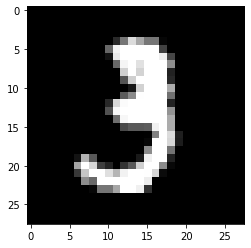

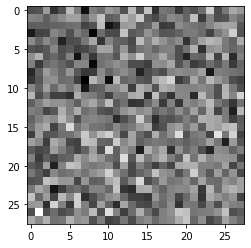

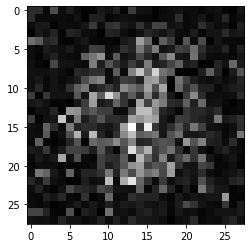

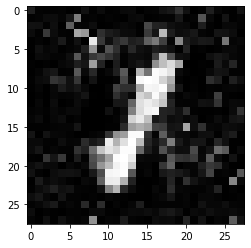

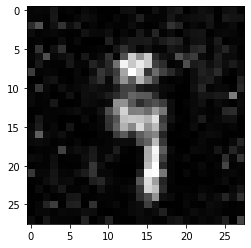

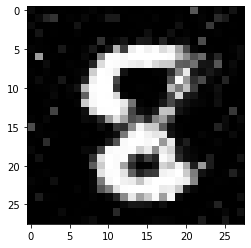

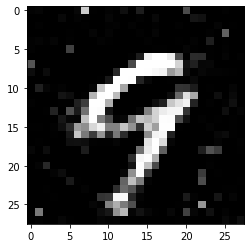

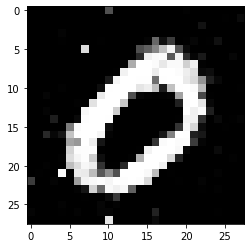

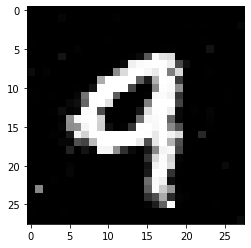

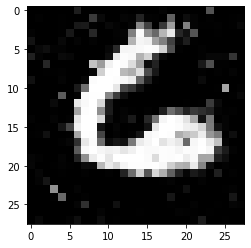

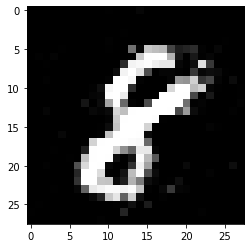

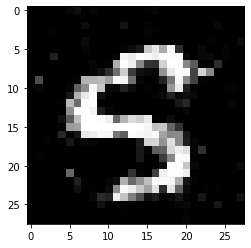

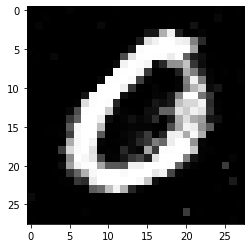

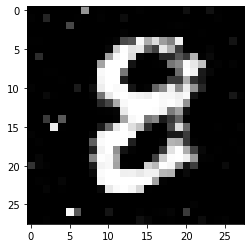

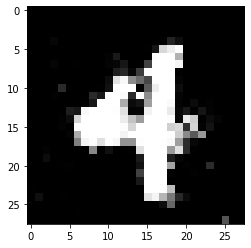

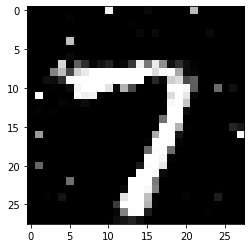

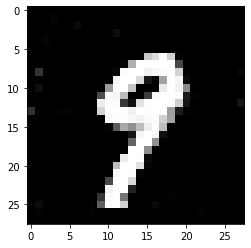

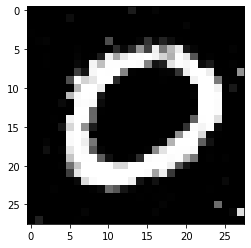

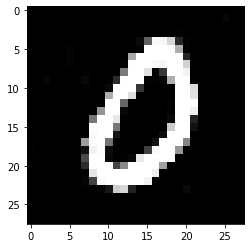

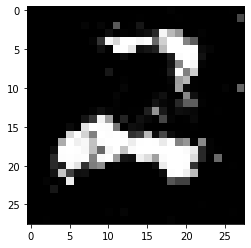

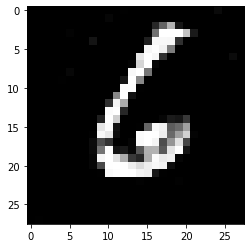

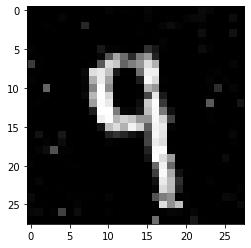

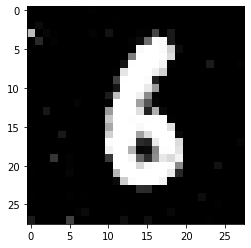

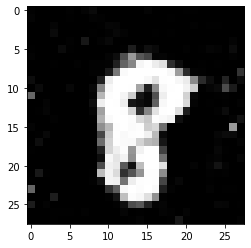

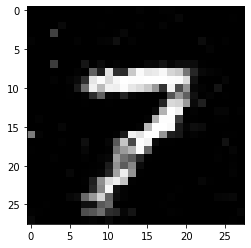

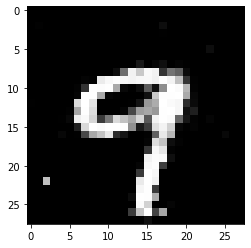

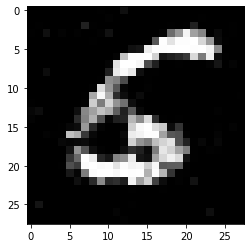

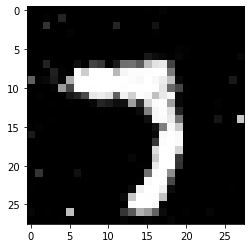

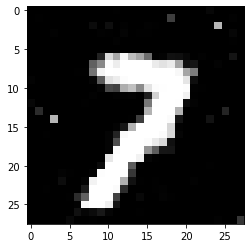

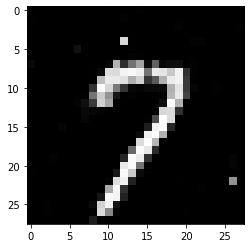

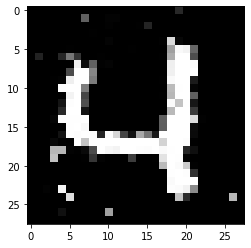

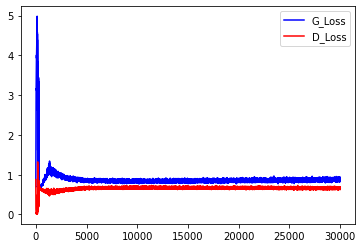

Time elapsed in Second : 3365.5689334869385


In [6]:
%tensorflow_version 2.x
import time
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt





class GAN():
  def __init__(self):


    ## Parameters
    self.H = 28
    self.W = 28
    self.channels = 1
    self.laten_dim = 100


    ## Loading MNIST Data set
    (self.train_images, _) , (_, _) = tf.keras.datasets.mnist.load_data()

    plt.imshow(self.train_images[10], 'gray')
    print(self.train_images.shape[0])


    ## Normalizing the training Data set
    self.train_images = np.expand_dims(self.train_images, axis=3)
    self.train_images = (self.train_images - 127.5) / 127.5


    ## Build and Compile Discriminator
    self.Discriminator = self.Discriminator_network()
    self.Discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5))


    ## Build Generator
    self.Generator = self.Generator_network()


    ## Combining Generator and Discriminator
    noise = tf.keras.layers.Input((self.laten_dim,))
    fake_image = self.Generator(noise)
    self.Discriminator.trainable = False
    y_hat = self.Discriminator(fake_image)


    self.GAN_net = tf.keras.models.Model(noise, y_hat)
    self.GAN_net.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5))


###################################################################################################################################
############################################################ Functions ############################################################
###################################################################################################################################


  ## Discriminator model
  def Discriminator_network(self):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
    model.add(tf.keras.layers.Dense(512))
    model.add(tf.keras.layers.LeakyReLU(0.2))
    #model.add(LeakyReLU(0.2))
    model.add(tf.keras.layers.Dense(256))
    model.add(tf.keras.layers.LeakyReLU(0.2))
    #model.add(LeakyReLU(0.2))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.summary()

    img = tf.keras.layers.Input((28, 28))
    output = model(img)

    #return tf.keras.models.Model(img, output)
    return model

  ## Generator model
  def Generator_network(self):
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(256, input_dim=100))
    model.add(tf.keras.layers.LeakyReLU(0.2))
    #model.add(LeakyReLU(0.2))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(tf.keras.layers.Dense(512))
    model.add(tf.keras.layers.LeakyReLU(0.2))
    #model.add(LeakyReLU(0.2))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(tf.keras.layers.Dense(1024))
    model.add(tf.keras.layers.LeakyReLU(0.2))
    #model.add(LeakyReLU(0.2))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(tf.keras.layers.Dense(28*28, activation='tanh'))
    model.add(tf.keras.layers.Reshape((28,28)))
    model.summary()

    noise = tf.keras.layers.Input((100,))
    img = model(noise)

    #return tf.keras.models.Model(noise, img)
    return model


###################################################################################################################################
########################################################## Training part ##########################################################
###################################################################################################################################

  def train(self, epochs, batch_size):
    ## Labeled output of the GAN
    real_output = np.ones((batch_size, 1))
    fake_output = np.zeros((batch_size, 1))

    d_loss = []
    g_loss = []
    iteration = []

    for epoch in range(epochs):

      ## Selecting Random batch
      index = np.random.randint(0, self.train_images.shape[0], batch_size)
      real_input_image = self.train_images[index]


      ## Preparing Latent variables for the Generator
      z = np.random.normal(0, 1, (batch_size, self.laten_dim))


      ## Output of the Generator for the Latent variable
      fake_input_image = self.Generator.predict(z)


      ## Training the Discriminator for each Batch
      real_Discriminator_loss = self.Discriminator.train_on_batch(real_input_image, real_output)
      fake_Discriminator_loss = self.Discriminator.train_on_batch(fake_input_image, fake_output)
      Discriminator_loss = 0.5*np.add(fake_Discriminator_loss , real_Discriminator_loss)


      ## Training the Generator for each Batch
      z = np.random.normal(0, 1, (batch_size, self.laten_dim))

      Generator_loss = self.GAN_net.train_on_batch(z, real_output)

      iteration.append(epoch)
      g_loss.append(np.mean(Generator_loss))
      d_loss.append(np.mean(Discriminator_loss))

      if(epoch % 100 == 0):
        print(f"{epoch} [Discriminator Loss : {np.mean(Discriminator_loss)}]  [Generator Loss : {np.mean(Generator_loss)}]")

      if (epoch % 1000 == 0):
        plt.figure()
        latent = np.random.normal(0, 1, (1, self.laten_dim))
        plt.imshow(tf.reshape(self.Generator.predict(latent), shape=(self.H, self.W)), cmap='gray')

        gen_output = self.Generator.predict(latent)
        d_out = self.Discriminator.predict(gen_output)
        print(f"preddicted output is : {d_out}")
    
    plt.figure(100)
    plt.plot(iteration, g_loss, 'b', label='G_Loss')
    plt.figure(100)
    plt.plot(iteration, d_loss, 'r', label='D_Loss')
    plt.legend()
    plt.show()



if __name__ == "__main__":
  start = time.time()
  obj = GAN()
  obj.train(30000, 128)
  end = time.time()
  print(f"Time elapsed in Second : {end - start}")







